In [1]:
import numpy as np

Iteration: 200, Max Difference: 1.21e-03


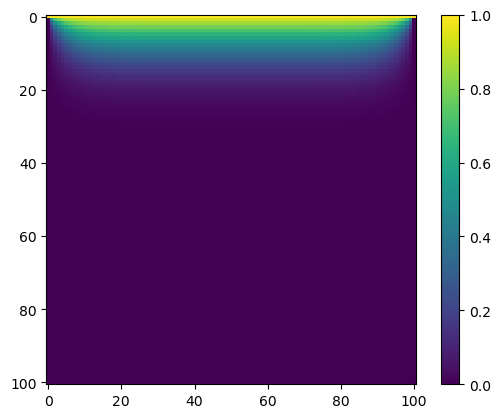

In [5]:
from pylab import imshow,gray,show
import matplotlib.pyplot as plt

#set up grid
nx,ny = 100,100
phi_ori = np.zeros([nx+1,ny+1],float)
phi_new = np.zeros([nx+1,ny+1],float)

phi_ori[0,:] = 1
#phi_ori[nx,:] =1
threshold = 1e-3
diff = 1
iteration = 0

while diff > threshold:

    for i in range (nx+1):
        for j in range (ny+1):
            if i ==0 or i ==100 or j==0 or j ==100:
                phi_new[i,j] = phi_ori[i,j]
            else:
                phi_new[i,j]= 1/4*(phi_ori[i+1,j]+phi_ori[i-1,j]+phi_ori[i,j+1]+phi_ori[i,j-1])

    diff = np.max(abs(phi_new-phi_ori))

    #swapping so that phi_ori is updated
    phi_ori,phi_new = phi_new,phi_ori
    iteration+=1

    if iteration %200 ==0:
        print (f"Iteration: {iteration}, Max Difference: {diff:.2e}")
plt.imshow(phi_new)
plt.colorbar()